# Sensor data Logger (CSV) 
by Marcelo Rovai @ 28Nov21

We will capture Accelerometer data from an Arduino Nano-33 Sense.

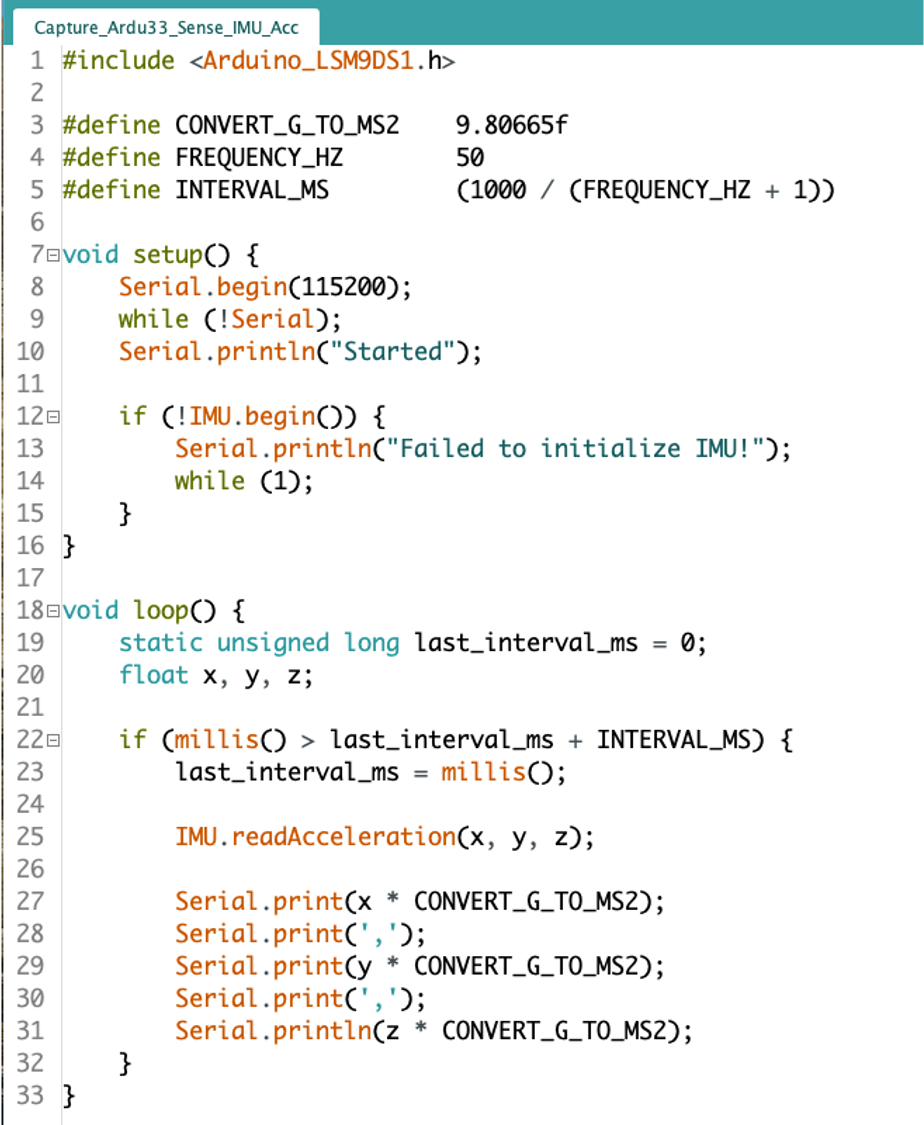

In [ ]:
import serial
import serial.tools.list_ports

In [ ]:
ports = serial.tools.list_ports.comports()

for port, desc, hwid in sorted(ports):
        print("{}: {} [{}]".format(port, desc, hwid))

/dev/cu.Bluetooth-Incoming-Port: n/a [n/a]
/dev/cu.MALS: n/a [n/a]
/dev/cu.RovaisAirPods-Wirelessi: n/a [n/a]
/dev/cu.SOC: n/a [n/a]
/dev/cu.usbmodem145101: Nano 33 BLE [USB VID:PID=2341:805A SER=4A5A361755F970F7 LOCATION=20-5.1]


In [ ]:
arduino_port = '/dev/cu.usbmodem145101'
baud_rate = 9600 #115200
ser = serial.Serial(port=arduino_port, baudrate=baud_rate)
ser

Serial<id=0x7f85a3fb90d0, open=True>(port='/dev/cu.usbmodem145101', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False)

In [ ]:
# move Arduino and test one reading 
ser.readline()

b'0.00,0.00,0.00\r\n'

In [ ]:
#display clean data
getData=str(ser.readline())
data=getData[2:][:-5]
print(data)

-0.12,-0.27,8.95


In [ ]:
def get_clean_data(ser):
    getData = str(ser.readline())
    data = getData[2:][:-5]
    return data

In [ ]:
for i in range (10):
    data = get_clean_data(ser)
    print(data)

-0.14,-0.28,9.76
-0.03,-0.35,9.31
-0.11,-0.28,9.73
-0.11,-0.28,9.73
-0.11,-0.29,9.73
-0.10,-0.28,9.69
-0.10,-0.28,9.69
-0.11,-0.28,9.69
-0.11,-0.28,9.67
-0.11,-0.28,9.68


## Creating an external CSV file

In [ ]:
fileName = "acc_test_data.csv"  # name of the CSV file generated

first_line = 'timestamp,accX,accY,accZ'
file = open(fileName, "w")
file.write(first_line + "\n")  # write data with a newline

# close out the file
file.close()

In [ ]:
Freq_hz = 50 #100 
num_seconds = 10  # number of seconds collecting data
samples = num_seconds * Freq_hz # number of samples to collect

In [ ]:
sample = 0
while sample <= samples:
    data = get_clean_data(ser)
    print(data)

    file = open(fileName, "a")
    file.write(str(sample) + "," + data + "\n")  # write data with a newline
    sample = sample+1
    

print("Data collection complete!")
file.close()

-0.11,-0.28,9.66
-0.11,-0.28,9.66
-0.10,-0.29,9.66
-0.10,-0.29,9.66
-0.11,-0.28,9.67
-0.11,-0.28,9.66
-0.09,-0.29,9.65
-0.11,-0.28,9.65
-0.10,-0.28,9.66
-0.11,-0.29,9.67
-0.11,-0.30,9.66
-0.10,-0.29,9.66
-0.10,-0.29,9.65
-0.10,-0.28,9.66
-0.11,-0.28,9.67
-0.11,-0.28,9.66
-0.11,-0.28,9.66
-0.11,-0.29,9.66
-0.10,-0.28,9.67
-0.10,-0.27,9.68
-0.10,-0.28,9.66
-0.11,-0.28,9.66
-0.10,-0.28,9.66
-0.11,-0.28,9.67
-0.10,-0.28,9.68
-0.10,-0.27,9.67
-0.11,-0.29,9.66
-0.10,-0.28,9.68
-0.11,-0.28,9.67
-0.10,-0.28,9.67
-0.11,-0.28,9.68
-0.11,-0.29,9.67
-0.11,-0.29,9.68
-0.10,-0.28,9.67
-0.11,-0.28,9.68
-0.11,-0.28,9.68
-0.11,-0.29,9.67
-0.10,-0.28,9.68
-0.10,-0.28,9.68
-0.10,-0.28,9.67
-0.11,-0.28,9.70
-0.10,-0.28,9.69
-0.11,-0.28,9.68
-0.10,-0.29,9.70
-0.10,-0.28,9.69
-0.10,-0.28,9.69
-0.10,-0.29,9.69
-0.11,-0.28,9.69
-0.11,-0.28,9.70
-0.11,-0.28,9.70
-0.11,-0.28,9.70
-0.11,-0.28,9.70
-0.11,-0.28,9.70
-0.10,-0.28,9.70
-0.10,-0.28,9.70
-0.10,-0.28,9.69
-0.11,-0.28,9.69
-0.10,-0.29,9.70
-0.10,-0.28,9.